In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data
df = pd.read_csv('../no_dummies_pre_imputed.csv')
df.head()

,federal_provider_number,total_deaths_per_1000,total_cases_per_1000,2020_cases_per_1000,2020_deaths_per_1000,2021_cases_per_1000,2021_deaths_per_1000,provider_city,provider_state,provider_zip_code,...,total_liabilities,total_fund_balances,total_general_inpatient_care_services_revenue,inpatient_revenue,gross_revenue,net_patient_revenue,less_total_operating_expense,net_income_from_service_to_patients,total_income,net_income
0,15009,188.68,1811.32,905.66,94.34,905.66,94.34,RUSSELLVILLE,AL,35653,...,184933.0,1539913.0,4395342.0,5332160.0,5332160.0,4727863.0,4601512.0,126351.0,135292.0,135292.0
1,15010,59.11,571.40,295.08,32.79,276.32,26.32,SYLACAUGA,AL,35150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15012,190.47,698.42,392.86,107.14,305.56,83.33,SCOTTSBORO,AL,35768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15014,28.57,1337.18,465.75,0.00,871.43,28.57,BIRMINGHAM,AL,35206,...,1182602.0,-1245467.0,5250439.0,6509363.0,6509363.0,7029701.0,7420717.0,-391016.0,-348410.0,-742239.0
4,15015,0.00,464.21,139.53,0.00,324.68,0.00,MC CALLA,AL,35111,...,793522.0,-645564.0,6145356.0,6904474.0,6904474.0,7176456.0,7626284.0,-449828.0,47080.0,-54046.0


In [3]:
df.shape

(13969, 66)

In [4]:
# Drop duplicates with same federal provider number
df.drop_duplicates(subset='federal_provider_number', inplace=True)
df.shape

(13435, 66)

In [5]:
df.set_index('federal_provider_number', inplace=True)

In [6]:
# Check for missing values
df.isnull().sum()

total_deaths_per_1000                     0
total_cases_per_1000                      0
2020_cases_per_1000                       0
2020_deaths_per_1000                      0
2021_cases_per_1000                       0
                                       ... 
net_patient_revenue                    1033
less_total_operating_expense            992
net_income_from_service_to_patients     993
total_income                           1018
net_income                             1031
Length: 65, dtype: int64

In [7]:
# Statistical summary of total deaths per 1000
df['total_deaths_per_1000'].describe()

count    13435.000000
mean       230.144344
std        254.451030
min          0.000000
25%         58.420000
50%        165.390000
75%        325.810000
max       7915.380000
Name: total_deaths_per_1000, dtype: float64

In [8]:
# drop the max row, believed to be misrecorded
df.loc[(df['total_deaths_per_1000']==7915.38)]
df = df.loc[(df['total_deaths_per_1000']!=7915.38)]
df['total_deaths_per_1000'].describe() 

count    13434.000000
mean       229.572270
std        245.668419
min          0.000000
25%         58.420000
50%        165.330000
75%        325.712500
max       3934.210000
Name: total_deaths_per_1000, dtype: float64

In [37]:
df.corr()['total_deaths_per_1000'].sort_values()

qm_rating                                                         -0.071635
overall_rating                                                    -0.058135
average_number_of_residents_per_day                               -0.051126
provider_zip_code                                                 -0.050581
total_costs                                                       -0.049699
adjusted_nurse_aide_staffing_hours_per_resident_per_day           -0.047911
rural_versus_urban                                                -0.046324
provider_resides_in_hospital                                      -0.044921
health_inspection_rating                                          -0.043758
reported_nurse_aide_staffing_hours_per_resident_per_day           -0.036618
reported_total_nurse_staffing_hours_per_resident_per_day          -0.035409
total_charges                                                     -0.034845
overhead_non-salary_costs                                         -0.034194
adjusted_tot

<Figure size 1080x1080 with 0 Axes>

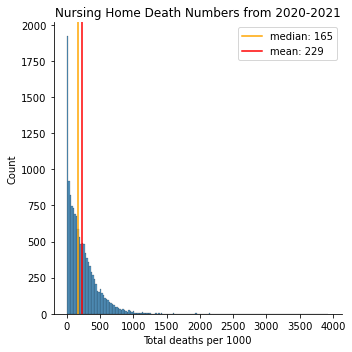

In [9]:
# Distribution of nursing home deaths per 1000 from 2020-2021
plt.figure(figsize=(15,15))
sns.displot(df['total_deaths_per_1000'])
plt.title('Nursing Home Death Numbers from 2020-2021')
plt.axvline(165, label='median: 165', c='orange')
plt.axvline(229, label='mean: 229', c='red')
plt.legend()
plt.xlabel('Total deaths per 1000')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('images/distribution_total_deaths.png');

In [10]:
# Statistical summary of average residents per day in nursing homes
df['average_number_of_residents_per_day'].describe()

count    13409.000000
mean        74.934507
std         43.817622
min          1.000000
25%         45.700000
50%         67.700000
75%         92.700000
max        704.600000
Name: average_number_of_residents_per_day, dtype: float64

<Figure size 1080x1080 with 0 Axes>

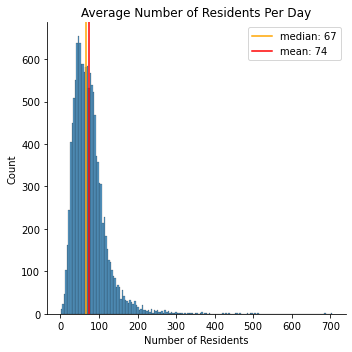

In [11]:
# Plot Distribution of average residents per day in nursing homes
plt.figure(figsize=(15,15))
sns.displot(df['average_number_of_residents_per_day'])
plt.title("Average Number of Residents Per Day")
plt.xlabel('Number of Residents')
plt.ylabel('Count')
plt.axvline(67, label='median: 67', c='orange')
plt.axvline(74, label= 'mean: 74', c='red')
plt.legend()
plt.tight_layout()
plt.savefig('images/distribution_residents.png')

In [12]:
df_high_deaths = df.loc[(df['total_deaths_per_1000']>1000)]

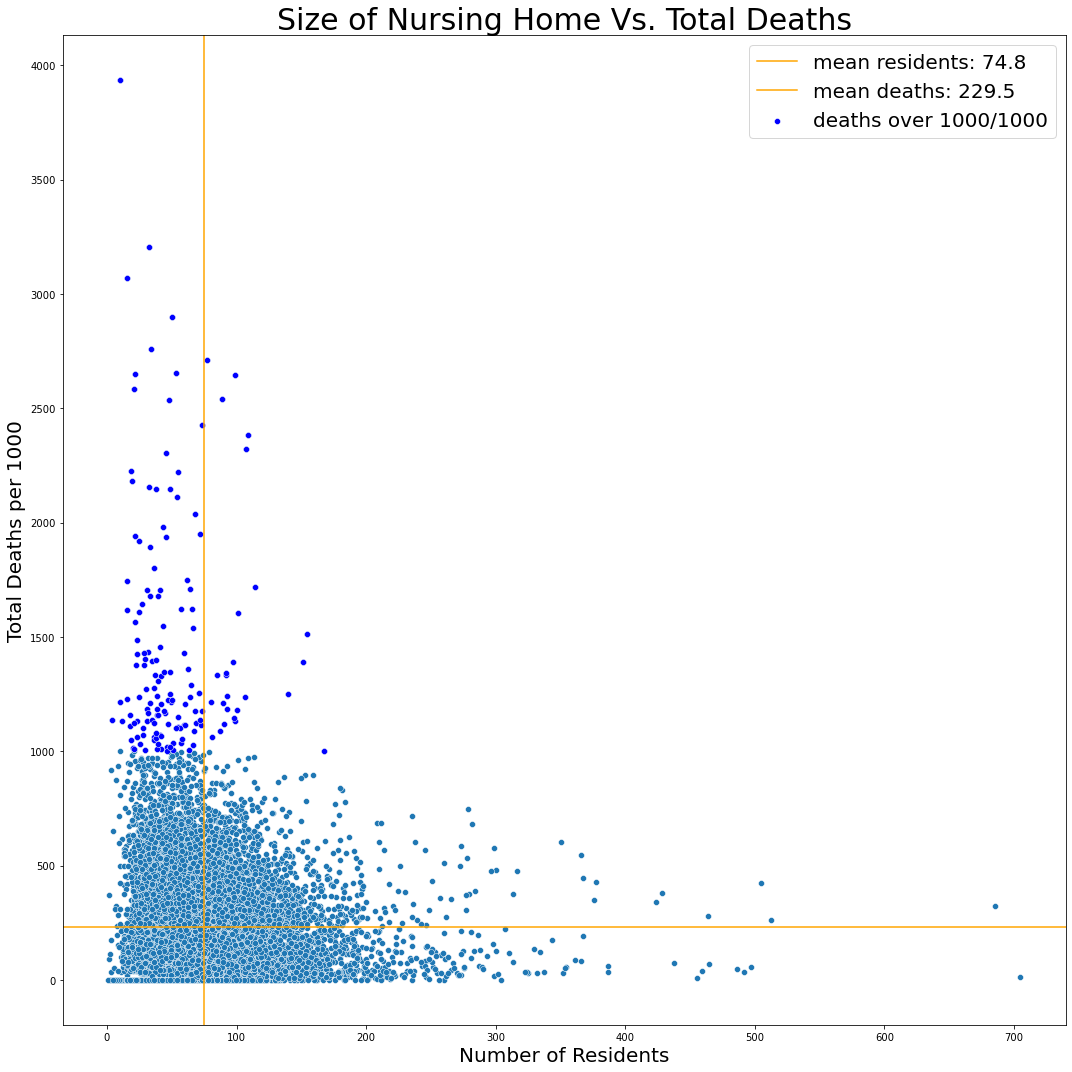

In [13]:
# Compare size of the nursing home vs. total deaths per 1000
plt.figure(figsize=(15,15))
sns.scatterplot(x=df['average_number_of_residents_per_day'], y=df['total_deaths_per_1000'])
sns.scatterplot(x=df_high_deaths['average_number_of_residents_per_day'], y=df_high_deaths['total_deaths_per_1000'], color='blue', label='deaths over 1000/1000')
plt.title("Size of Nursing Home Vs. Total Deaths", fontsize = 30)
plt.xlabel('Number of Residents', fontsize=20)
plt.ylabel('Total Deaths per 1000', fontsize=20)
plt.axvline(74.8, label='mean residents: 74.8', c='orange')
plt.axhline(229.5, label= 'mean deaths: 229.5', c='orange')
plt.legend(fontsize=20)
plt.tight_layout()
plt.savefig('images/scatter_residents_vs_deaths.png')

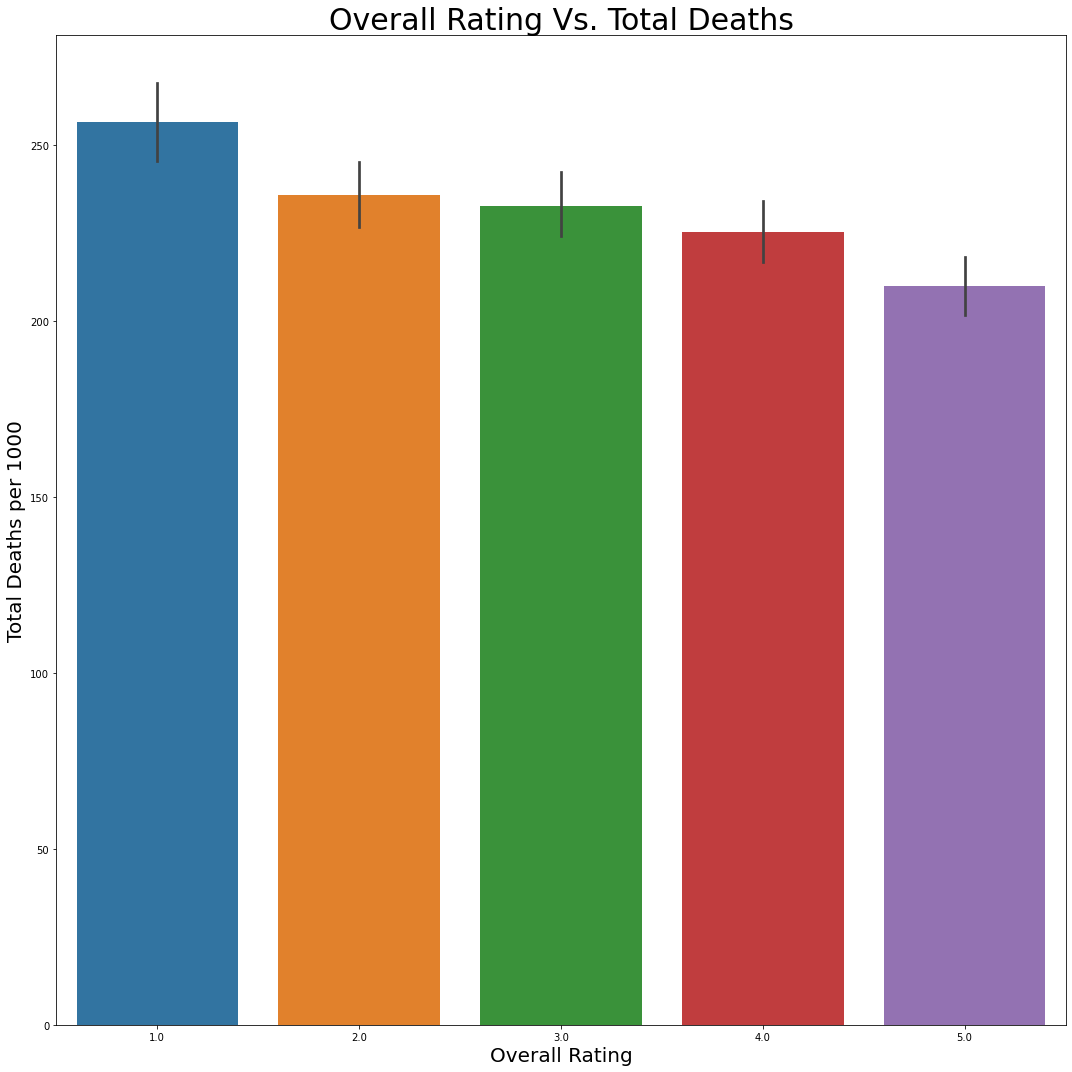

In [14]:
# Compare overall rating vs. total deaths per 1000 
plt.figure(figsize=(15,15))
sns.barplot(x=df['overall_rating'], y=df['total_deaths_per_1000'])
plt.title("Overall Rating Vs. Total Deaths", fontsize = 30)
plt.xlabel('Overall Rating', fontsize=20)
plt.ylabel('Total Deaths per 1000', fontsize=20)
plt.tight_layout()
plt.savefig('images/country_overall_rating_vs_deaths.png')

In [15]:
# Nursing homes with high numbers of deaths
df_high_deaths = df.loc[(df['total_deaths_per_1000'] >=1000)]
df_high_deaths

,total_deaths_per_1000,total_cases_per_1000,2020_cases_per_1000,2020_deaths_per_1000,2021_cases_per_1000,2021_deaths_per_1000,provider_city,provider_state,provider_zip_code,provider_county_name,...,total_liabilities,total_fund_balances,total_general_inpatient_care_services_revenue,inpatient_revenue,gross_revenue,net_patient_revenue,less_total_operating_expense,net_income_from_service_to_patients,total_income,net_income
federal_provider_number,,,,,,,,,,,,,,,,,,,,,
15104,2222.22,1370.37,629.63,1111.11,740.74,1111.11,MARION,AL,36756,Perry,...,3418895.0,-2231360.0,4500175.0,4705718.0,4705718.0,6056211.0,5782572.0,273639.0,305856.0,305856.0
45172,2147.62,2480.96,1314.29,1171.43,1166.67,976.19,DERMOTT,AR,71638,Chicot,...,552931.0,1948886.0,3896708.0,4358652.0,4358652.0,4061021.0,4189149.0,-128128.0,-92467.0,-92467.0
45202,1709.10,3018.18,1381.82,854.55,1636.36,854.55,NORTH LITTLE ROCK,AR,72116,Pulaski,...,1472003.0,236211.0,6065267.0,8070724.0,8070724.0,6813388.0,6371166.0,442222.0,444215.0,444215.0
45435,2384.17,2282.82,1273.81,1357.14,1009.01,1027.03,ROGERS,AR,72758,Benton,...,581406.0,1351370.0,9437622.0,13973518.0,13973518.0,11616436.0,11496879.0,119557.0,127757.0,127757.0
55160,1016.74,219.99,98.04,431.37,121.95,585.37,LOS ANGELES,CA,90035,Los Angeles,...,-397779.0,2356095.0,5314194.0,9672185.0,9672185.0,7433868.0,6785959.0,647909.0,790044.0,790044.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675982,1149.72,2445.06,1230.77,596.15,1214.29,553.57,SAN ANGELO,TX,76901,Tom Green,...,574004.0,21273.0,4866112.0,6572441.0,6572441.0,6040948.0,5585269.0,455679.0,456037.0,456037.0
676072,1290.17,1798.42,1121.95,804.88,676.47,485.29,CORRIGAN,TX,75939,Polk,...,334071.0,89904.0,2991998.0,3750923.0,3750923.0,3629983.0,3531604.0,98379.0,98761.0,98761.0
676140,1133.33,10483.33,7400.00,800.00,3083.33,333.33,REFUGIO,TX,78377,Refugio,...,621426.0,716932.0,1281049.0,1648583.0,1648583.0,1579745.0,1397375.0,182370.0,183127.0,183127.0


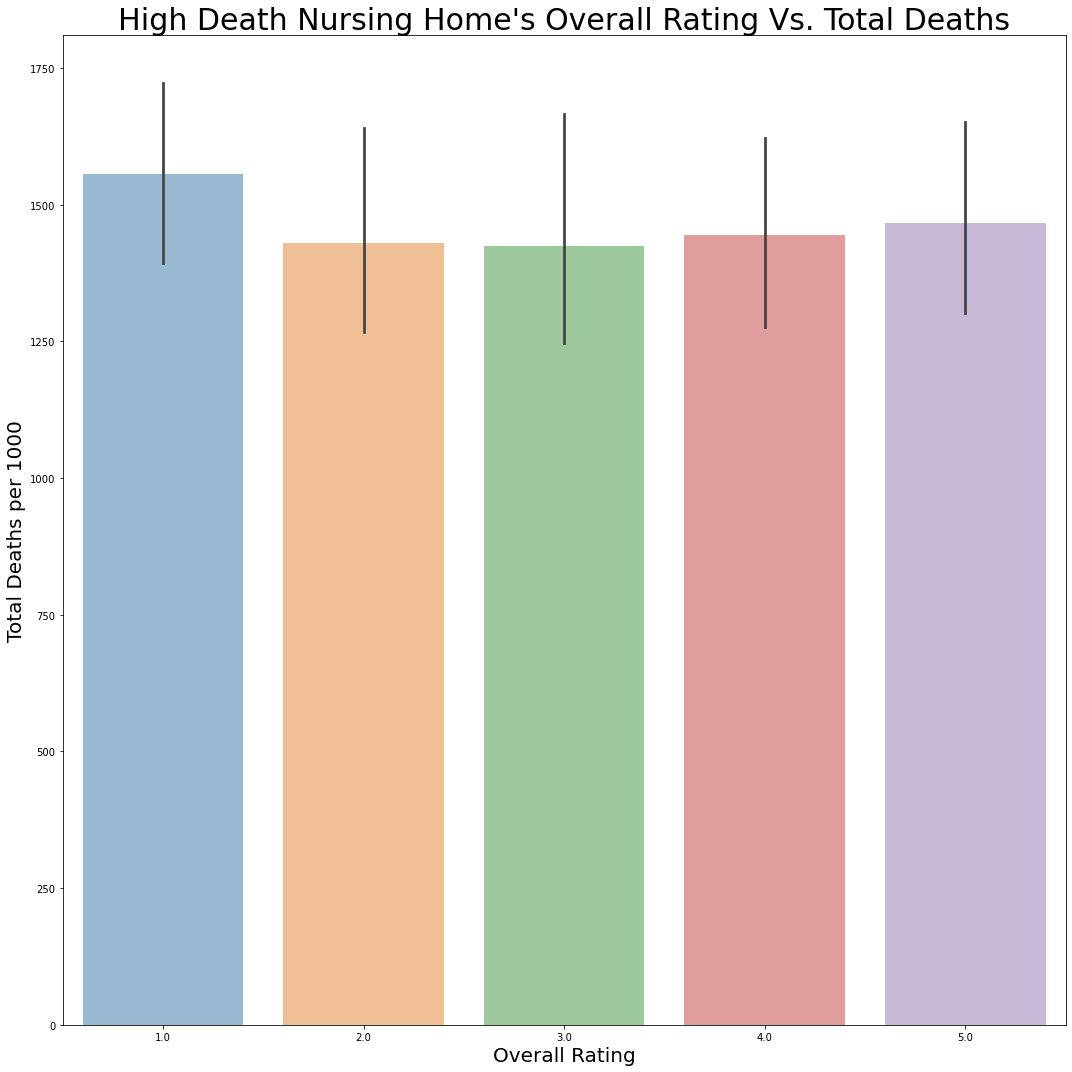

In [16]:
# Overall Rating for nursing homes with total deaths more than 1000 vs. Total Deaths
plt.figure(figsize=(15,15))
sns.barplot(x=df_high_deaths['overall_rating'], y=df_high_deaths['total_deaths_per_1000'], alpha=0.5)
plt.title("High Death Nursing Home's Overall Rating Vs. Total Deaths", fontsize=30)
plt.xlabel('Overall Rating', fontsize=20)
plt.ylabel('Total Deaths per 1000', fontsize=20)

plt.tight_layout()
plt.savefig('images/hideath_overall_rating_vs_deaths.png')

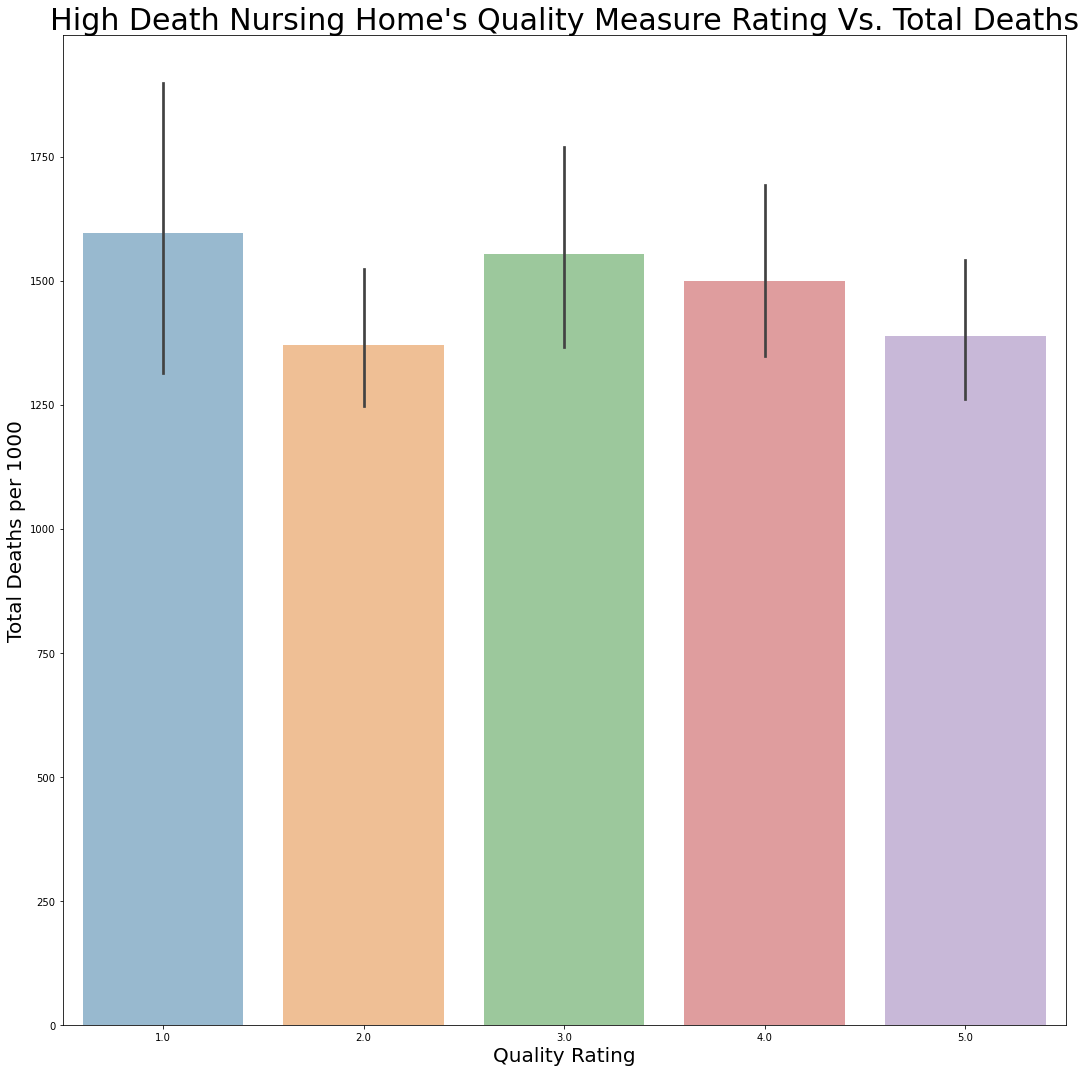

In [17]:
# Quality Measure Rating for nursing homes with total deaths more than 1000 vs. Total Deaths
plt.figure(figsize=(15,15))
sns.barplot(x=df_high_deaths['qm_rating'], y=df_high_deaths['total_deaths_per_1000'], alpha=0.5)
plt.title("High Death Nursing Home's Quality Measure Rating Vs. Total Deaths", fontsize=30)
plt.xlabel('Quality Rating', fontsize=20)
plt.ylabel('Total Deaths per 1000', fontsize=20)

plt.tight_layout()
plt.savefig('images/hideath_qm_rating_vs_deaths.png')

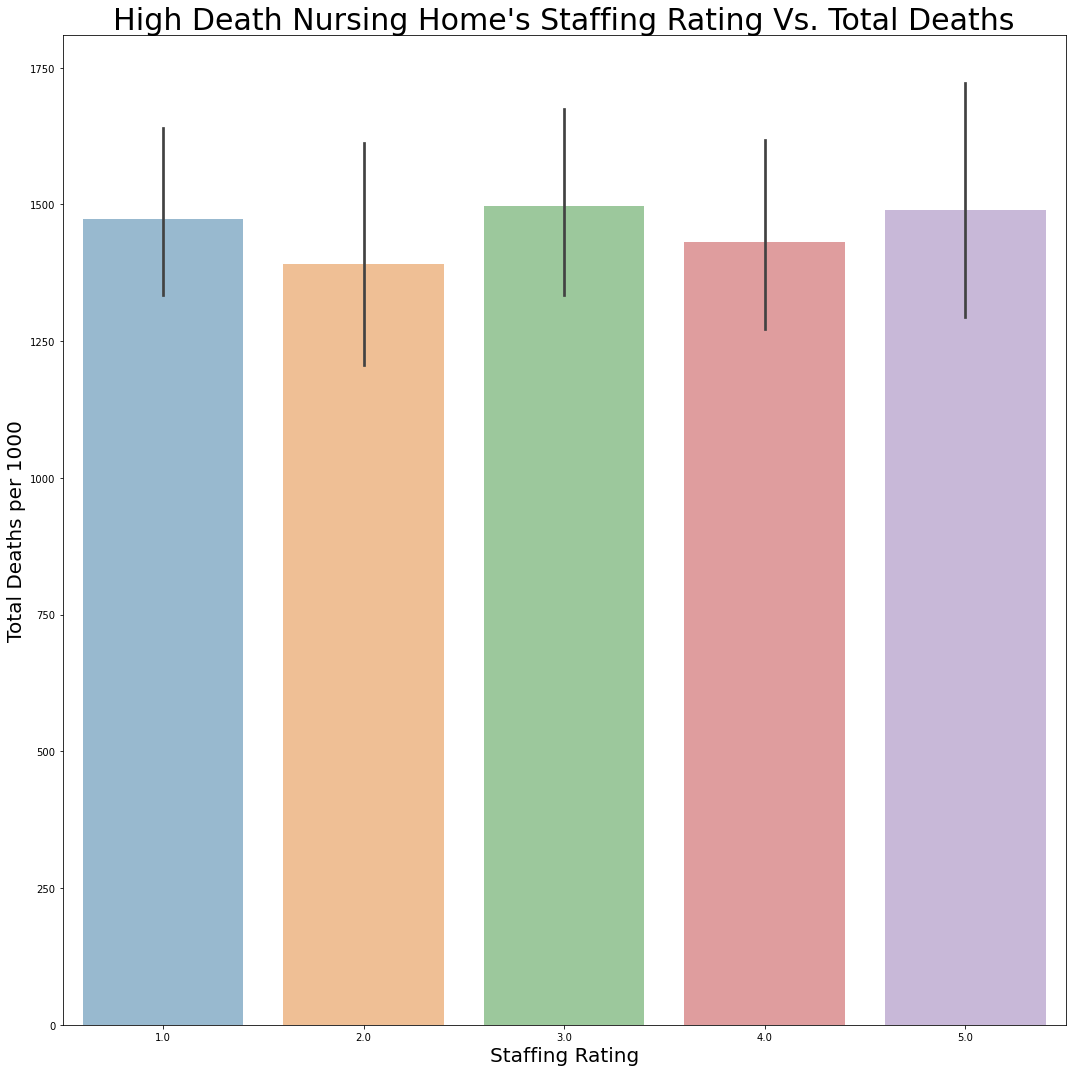

In [18]:
# Staffing Measure Rating for nursing homes with total deaths more than 1000 vs. Total Deaths
plt.figure(figsize=(15,15))
sns.barplot(x=df_high_deaths['staffing_rating'], y=df_high_deaths['total_deaths_per_1000'], alpha=0.5)
plt.title("High Death Nursing Home's Staffing Rating Vs. Total Deaths", fontsize=30)
plt.xlabel('Staffing Rating', fontsize=20)
plt.ylabel('Total Deaths per 1000', fontsize=20)
plt.tight_layout()
plt.savefig('images/hideath_staffing_rating_vs_deaths.png')

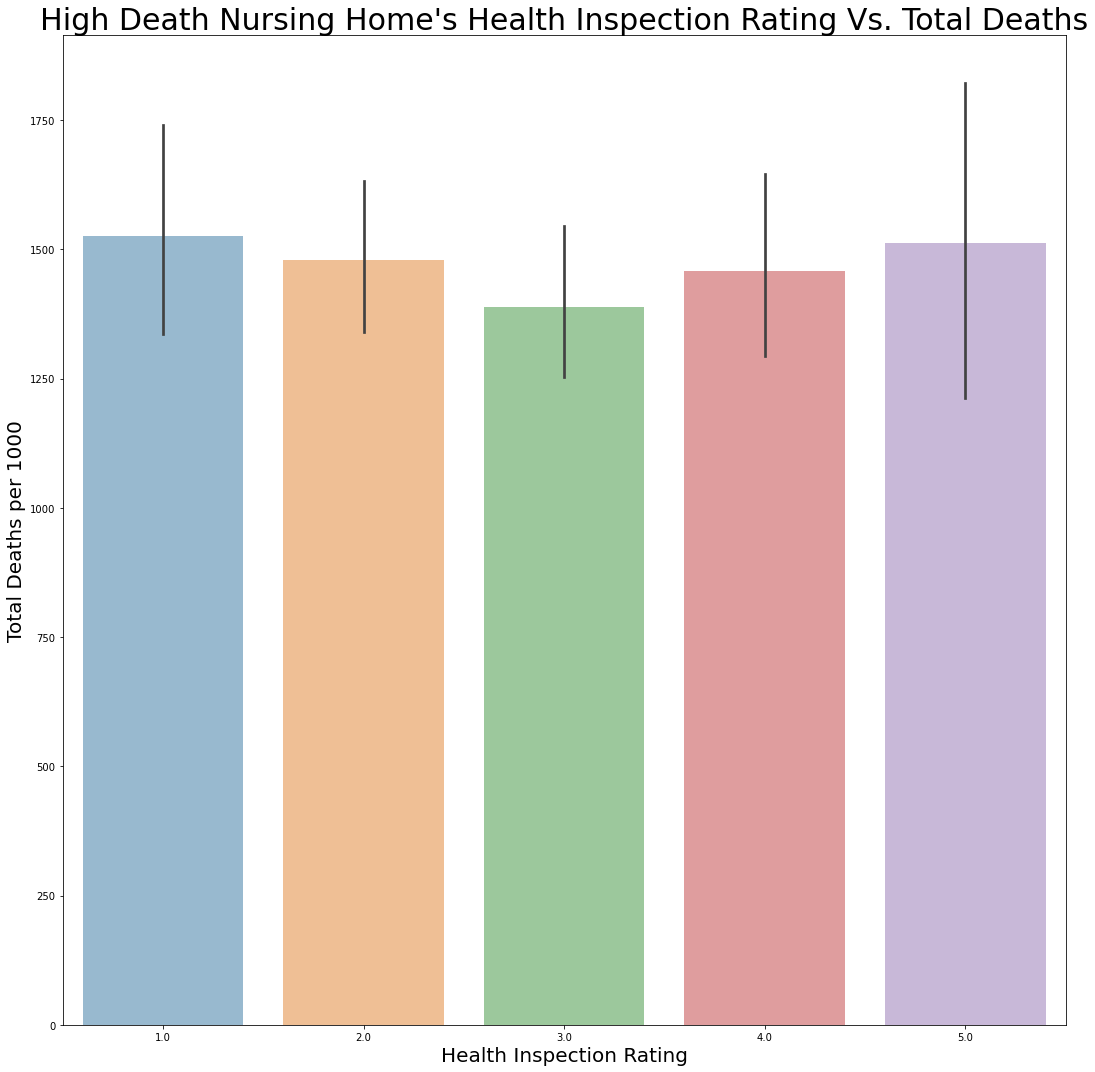

In [19]:
# Staffing Measure Rating for nursing homes with total deaths more than 1000 vs. Total Deaths
plt.figure(figsize=(15,15))
sns.barplot(x=df_high_deaths['health_inspection_rating'], y=df_high_deaths['total_deaths_per_1000'], alpha=0.5 )
plt.title("High Death Nursing Home's Health Inspection Rating Vs. Total Deaths", fontsize=30)
plt.xlabel('Health Inspection Rating', fontsize=20)
plt.ylabel('Total Deaths per 1000', fontsize=20)

plt.tight_layout()
plt.savefig('images/hideath_hi_rating_vs_deaths.png')

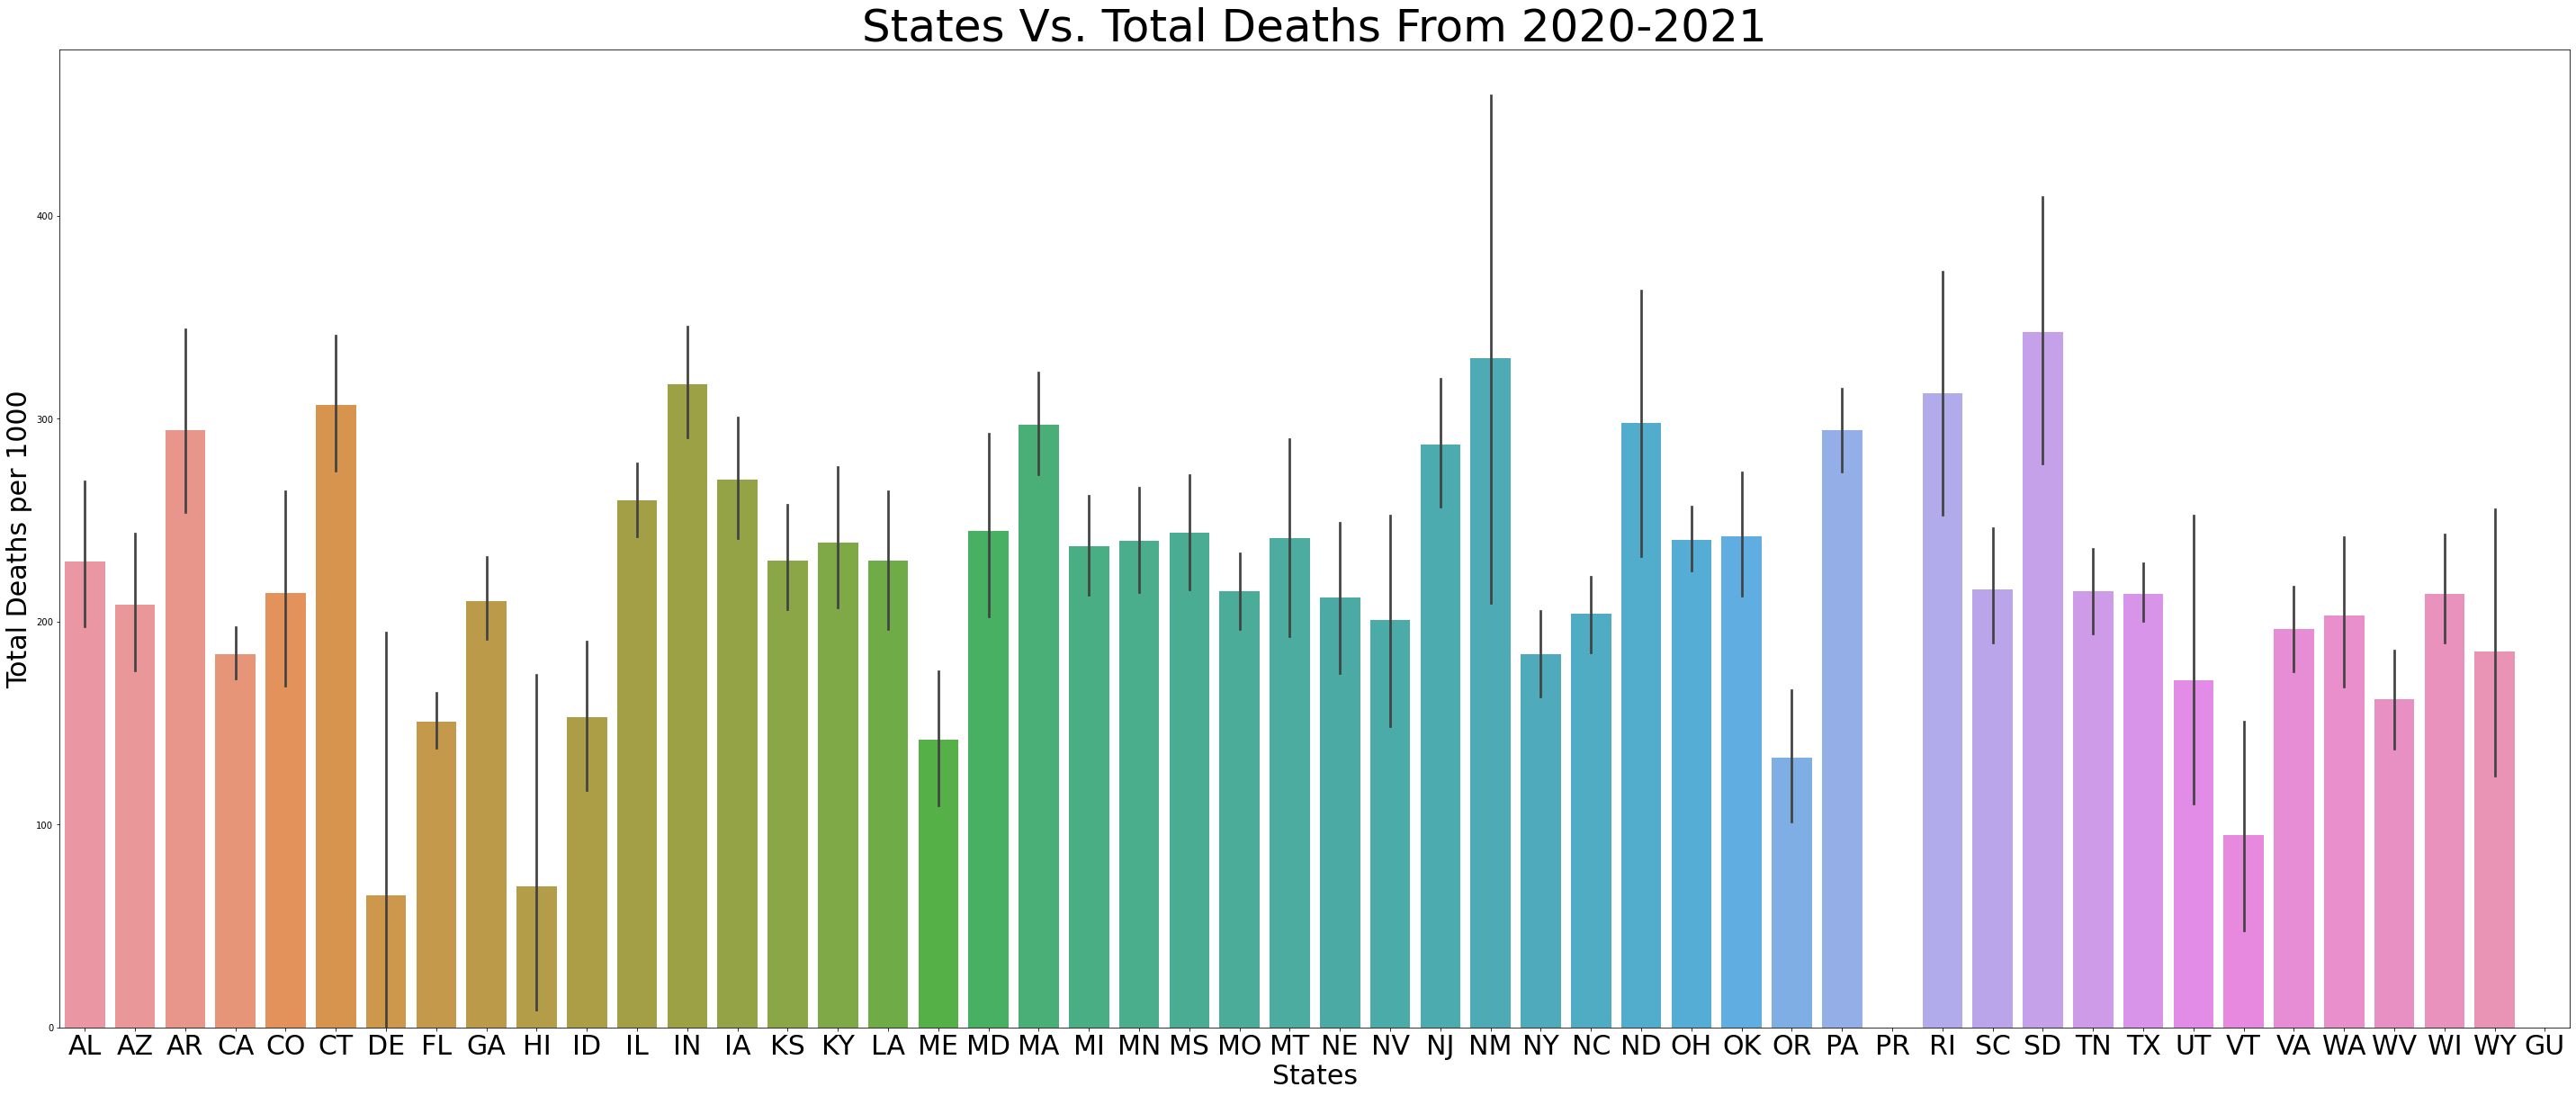

In [20]:
plt.figure(figsize=(50, 20))
sns.barplot(x=df['provider_state'], y=df['total_deaths_per_1000'])
plt.title('States Vs. Total Deaths From 2020-2021', fontsize=50)
plt.xticks(fontsize=30)
plt.xlabel('States', fontsize=30)
plt.ylabel('Total Deaths per 1000', fontsize=30)
plt.tight_layout
plt.savefig('images/state_deaths.png');

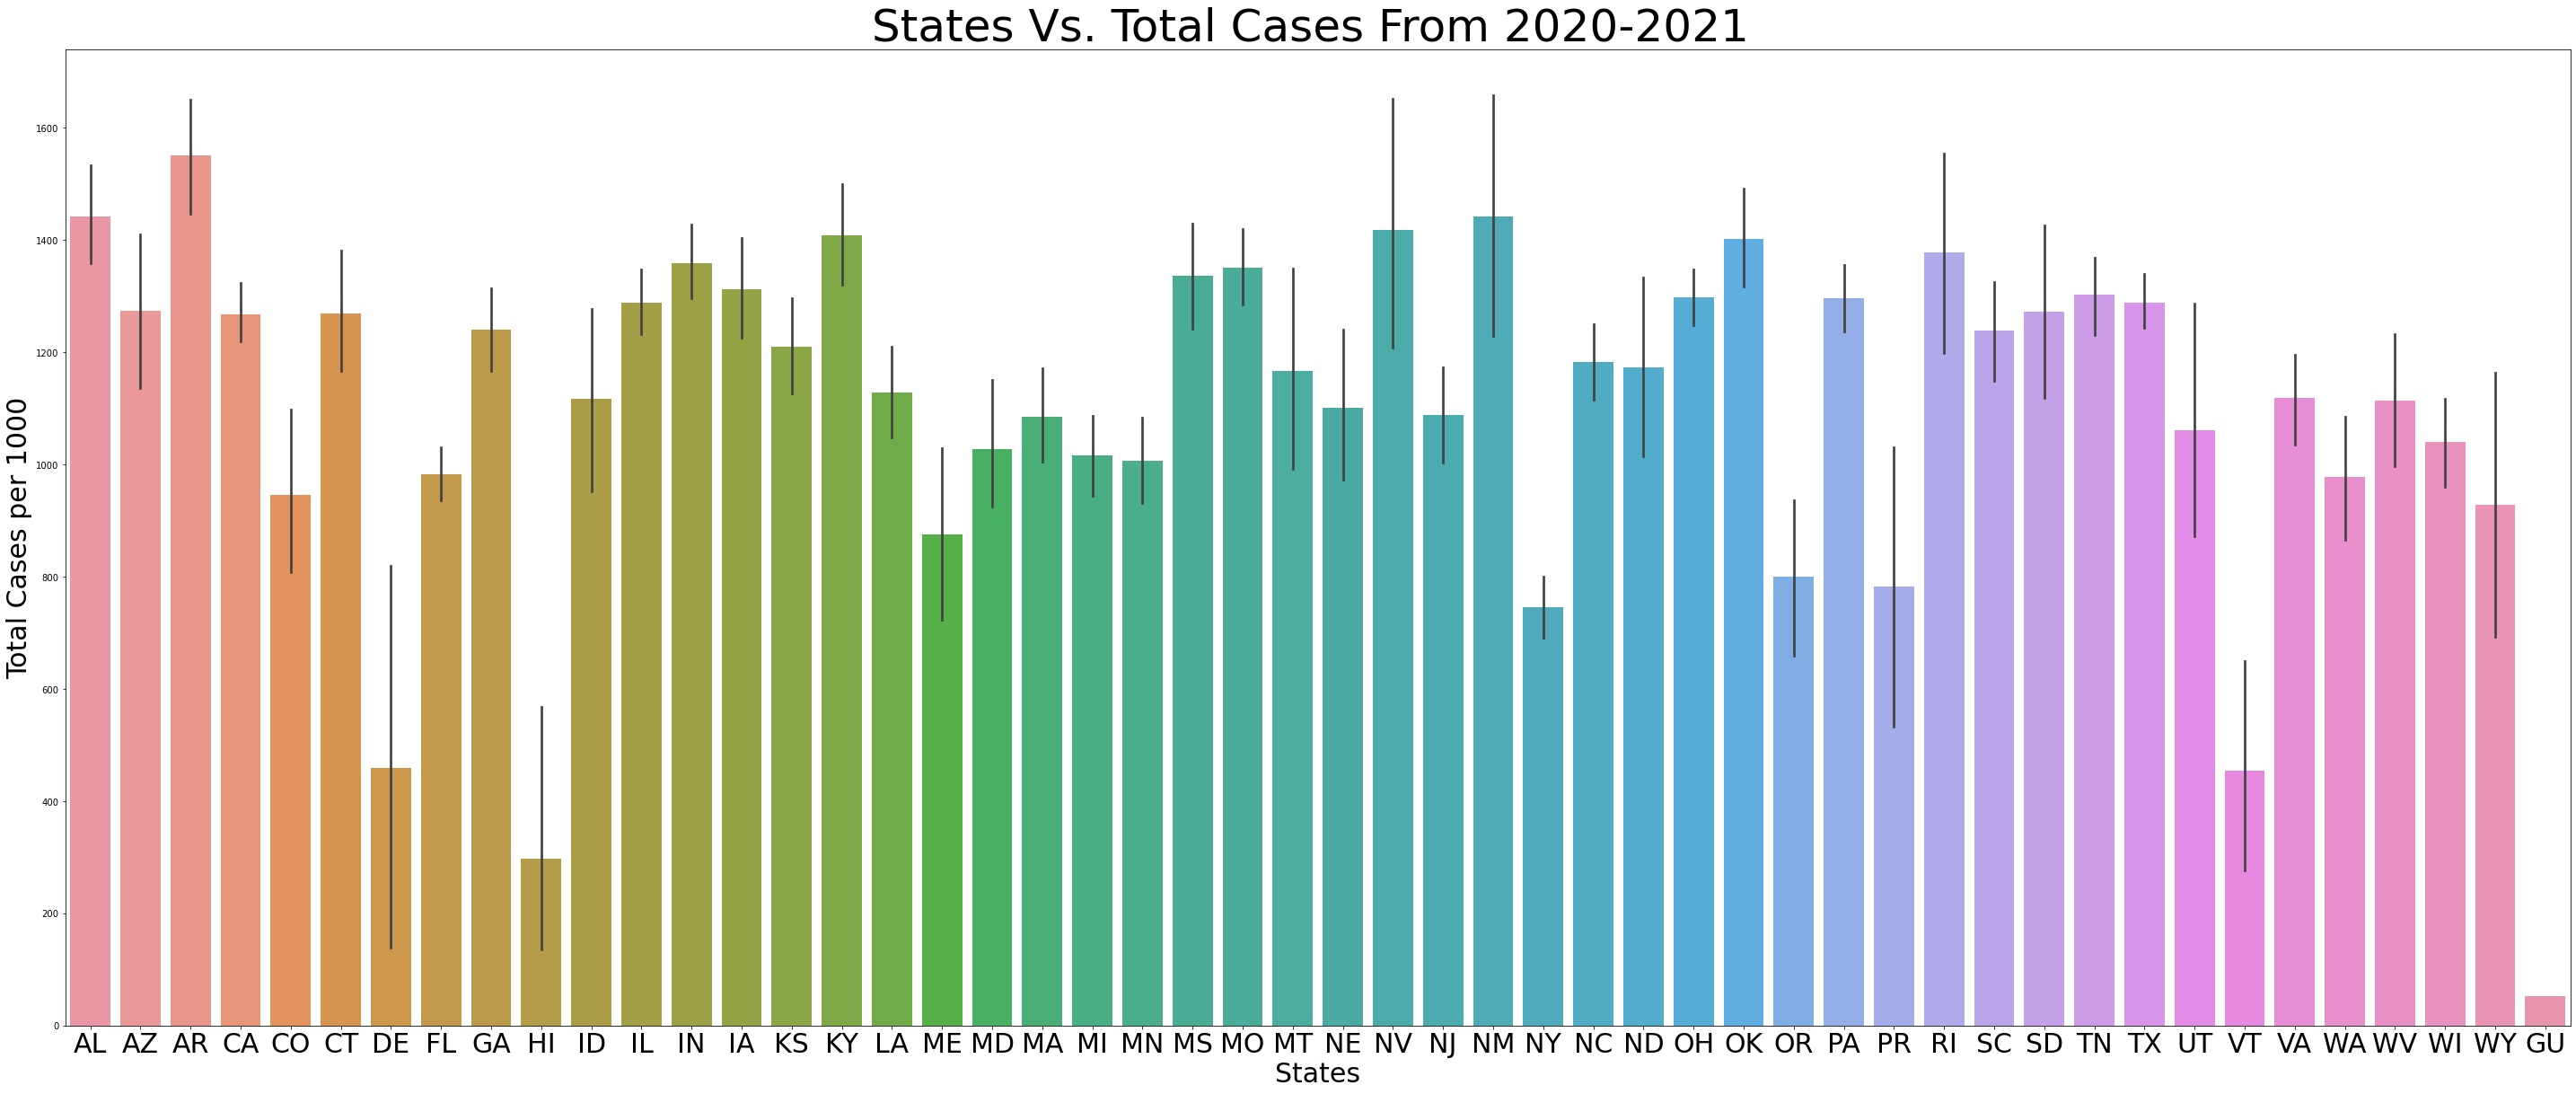

In [21]:
plt.figure(figsize=(50, 20))
sns.barplot(x=df['provider_state'], y=df['total_cases_per_1000'])
plt.title('States Vs. Total Cases From 2020-2021 ', fontsize=50)
plt.xticks(fontsize=30)
plt.xlabel('States',fontsize=30)
plt.ylabel('Total Cases per 1000', fontsize=30)
plt.tight_layout
plt.savefig('images/state_cases.png');

In [22]:
# Top 3 States with highest mean death per 1000
df.groupby(by='provider_state').mean()['total_deaths_per_1000'].sort_values(ascending=False).head(3)

provider_state
SD    342.459703
NM    329.832353
IN    316.826553
Name: total_deaths_per_1000, dtype: float64

In [23]:
print(f"SD {df.loc[(df['provider_state']=='SD')].shape}")
print(f"NM {df.loc[(df['provider_state']=='NM')].shape}")
print(f"IN {df.loc[(df['provider_state']=='IN')].shape}")

SD (101, 65)
NM (51, 65)
IN (499, 65)


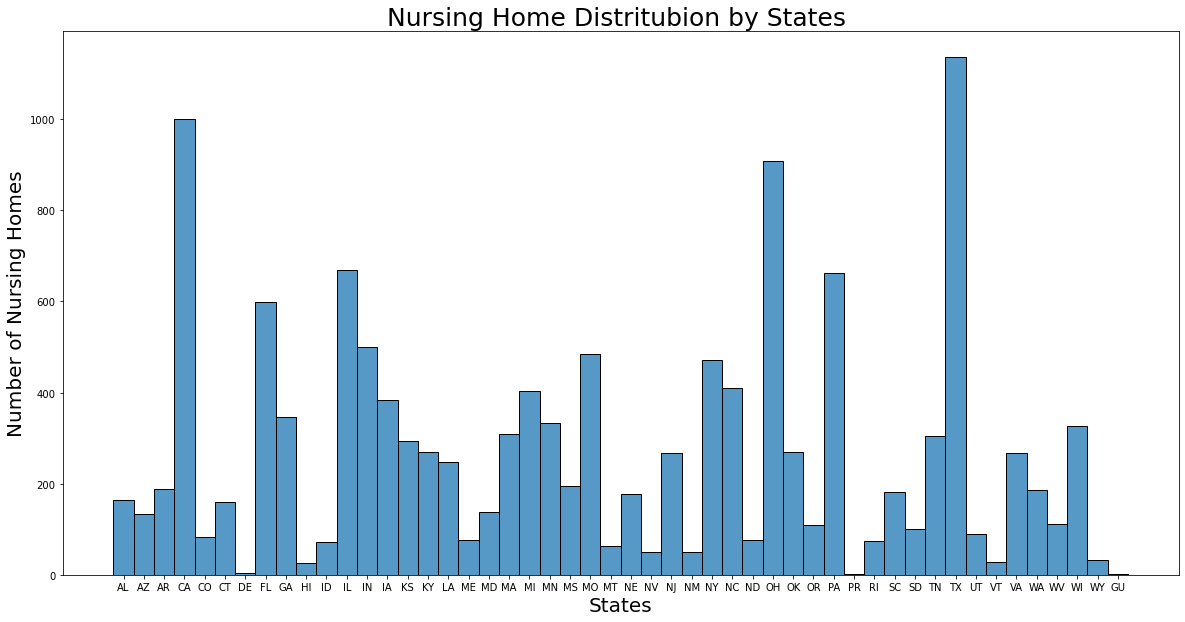

In [24]:
plt.figure(figsize=(20, 10))
sns.histplot(df['provider_state'])
plt.title('Nursing Home Distritubion by States ', fontsize=25)
plt.xlabel('States', fontsize=20)
plt.ylabel('Number of Nursing Homes', fontsize=20)
plt.tight_layout
plt.savefig('images/nh_by_states.png')

In [25]:
df['provider_state'].value_counts().head(3)

TX    1136
CA    1001
OH     909
Name: provider_state, dtype: int64

In [ ]:
# export mean death per 1000 by states
df_deaths = df[['provider_state', 'total_deaths_per_1000']]
df_deaths = df_deaths.set_index('provider_state')
df_deaths = df_deaths.groupby(by='provider_state').mean()
df_deaths.to_csv('shirley_extra/df_deaths.csv')

In [27]:
# Small dataframes on state level. Top 3 states with the most nursing homes. 
df_tx = df.loc[(df['provider_state']=='TX')]
tx = df_tx[['overall_rating', 'qm_rating', 'health_inspection_rating', 'staffing_rating', 'total_deaths_per_1000']]
df_ca = df.loc[(df['provider_state']=='CA')]
ca = df_ca[['overall_rating', 'qm_rating', 'health_inspection_rating', 'staffing_rating', 'total_deaths_per_1000']]
df_oh = df.loc[(df['provider_state']=='OH')]
oh = df_oh[['overall_rating', 'qm_rating', 'health_inspection_rating', 'staffing_rating', 'total_deaths_per_1000']]

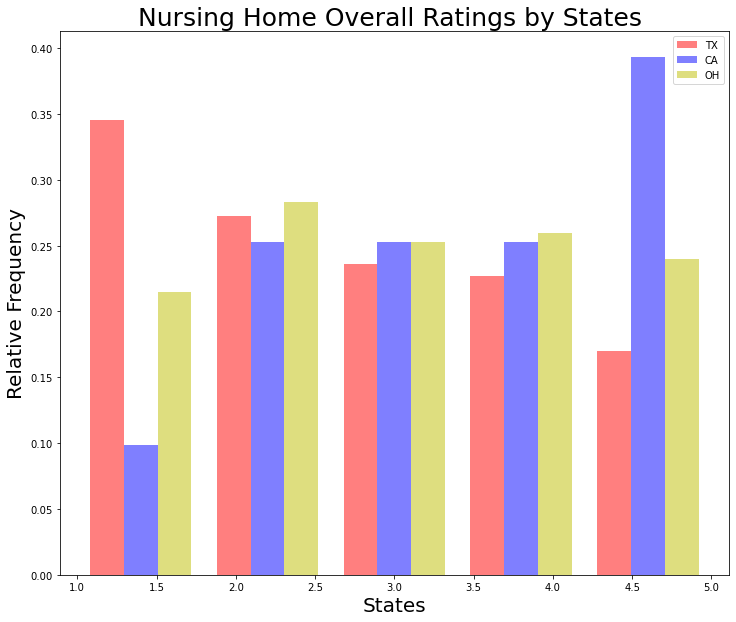

In [28]:
plt.figure(figsize=(12,10))
plt.hist([tx['overall_rating'], ca['overall_rating'], oh['overall_rating']], color=['r','b','y'], label = ['TX', 'CA', 'OH'], density=True, bins=5, alpha=0.5)
plt.title('Nursing Home Overall Ratings by States ', fontsize=25)
plt.xlabel('States', fontsize=20)
plt.ylabel('Relative Frequency', fontsize=20)
plt.legend()
plt.tight_layout
plt.savefig('images/top_3_overall.png')

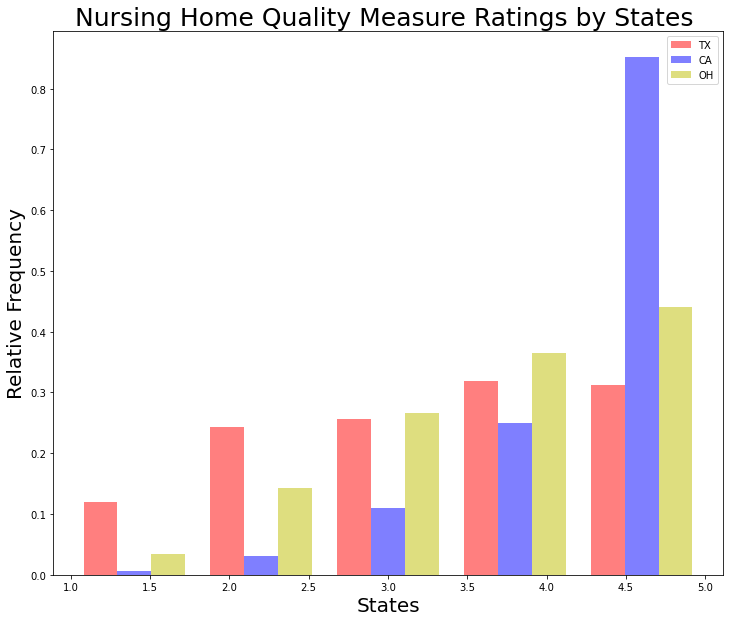

In [29]:
plt.figure(figsize=(12,10))

plt.hist([tx['qm_rating'], ca['qm_rating'], oh['qm_rating']], color=['r','b','y'], label = ['TX', 'CA', 'OH'], alpha=0.5, density=True, bins=5)
plt.title('Nursing Home Quality Measure Ratings by States ', fontsize=25)
plt.xlabel('States', fontsize=20)
plt.ylabel('Relative Frequency', fontsize=20)
plt.legend()
plt.tight_layout
plt.savefig('images/top_3_qm.png')

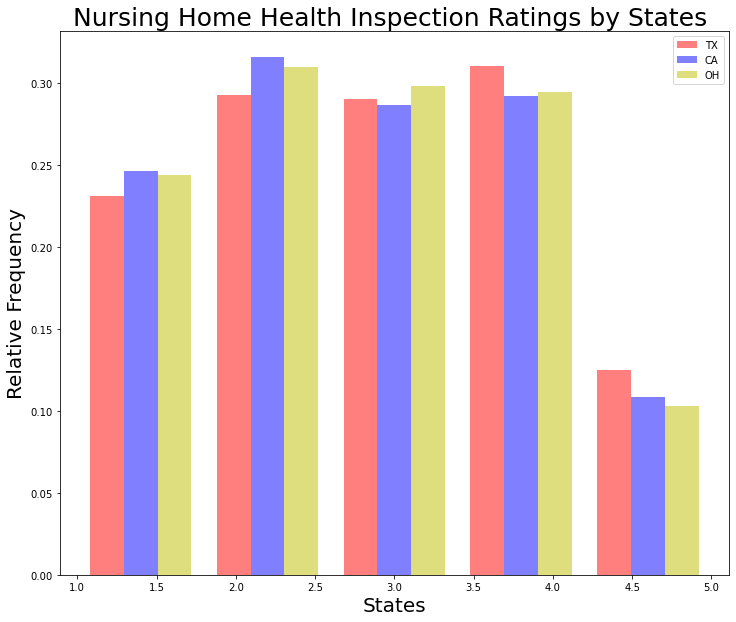

In [30]:
plt.figure(figsize=(12,10))

plt.hist([tx['health_inspection_rating'], ca['health_inspection_rating'], oh['health_inspection_rating']], color=['r','b','y'], label = ['TX', 'CA', 'OH'], alpha=0.5, density=True, bins=5)
plt.title('Nursing Home Health Inspection Ratings by States ', fontsize=25)
plt.xlabel('States', fontsize=20)
plt.ylabel('Relative Frequency', fontsize=20)
plt.legend()
plt.tight_layout
plt.savefig('images/top_3_hi.png')

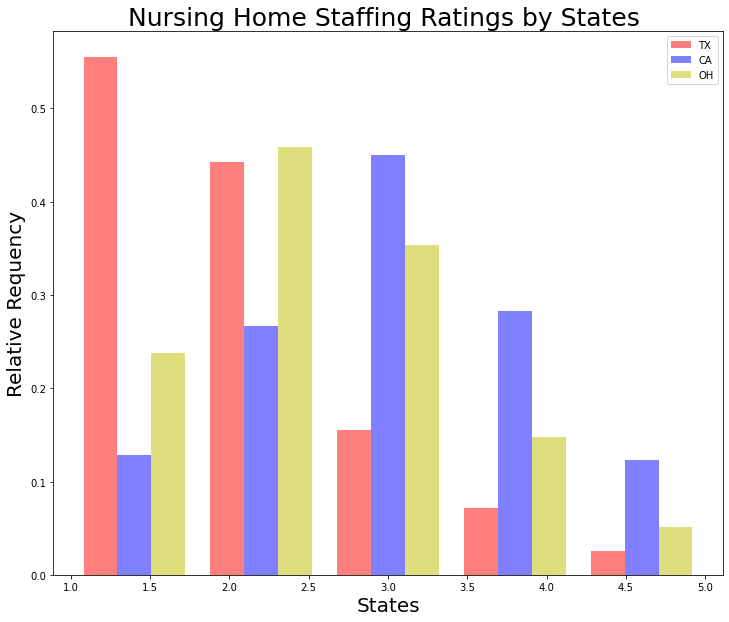

In [31]:
plt.figure(figsize=(12,10))

plt.hist([tx['staffing_rating'], ca['staffing_rating'], oh['staffing_rating']], color=['r','b','y'], label = ['TX', 'CA', 'OH'], alpha=0.5, density=True, bins=5)
plt.title('Nursing Home Staffing Ratings by States ', fontsize=25)
plt.xlabel('States', fontsize=20)
plt.ylabel('Relative Requency', fontsize=20)
plt.legend()
plt.tight_layout
plt.savefig('images/top_3_staffing.png')